# Función de costo o coste
## Error
######
#### Ejemplo completo que ilustra cómo calcular y visualizar una función de coste, en este caso, el Error Cuadrático Medio (MSE), en el contexto de una regresión lineal simple.

El ejemplo incluye:

1. Generar datos sintéticos.
2. Ajustar un modelo de regresión lineal.
3. Calcular el MSE.
4. Visualizar gráficamente cómo varía el coste al ajustar los parámetros del modelo.

MSE del modelo ajustado: 4.91


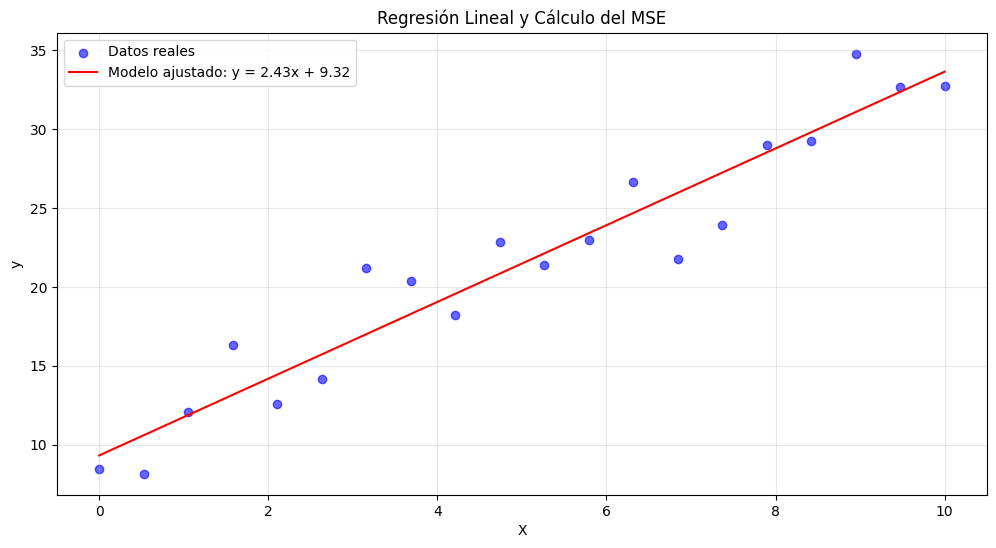

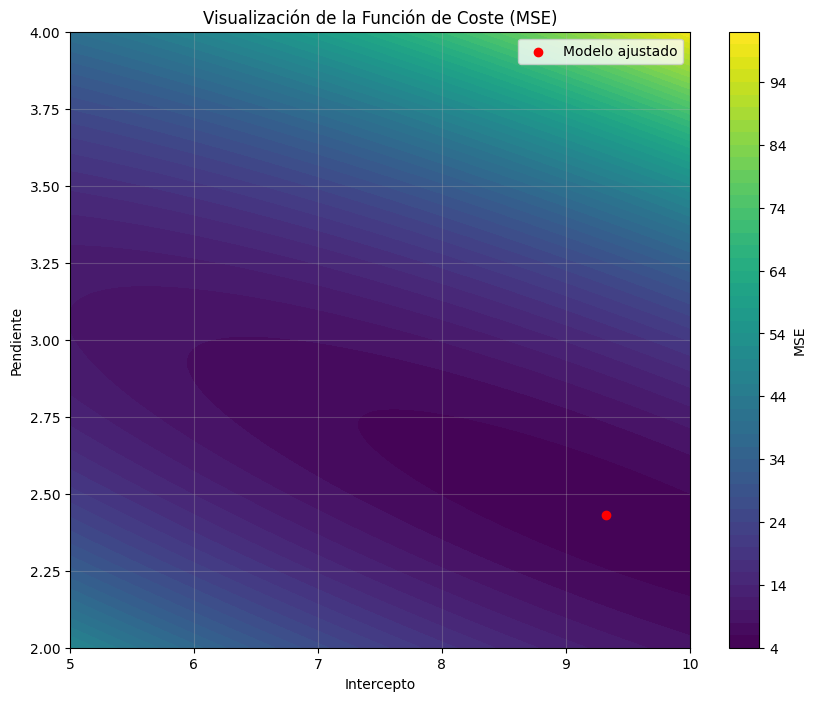

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generar datos sintéticos
np.random.seed(42)
X = np.linspace(0, 10, 20)  # Datos independientes
y = 3 * X + 7 + np.random.normal(0, 3, len(X))  # Datos dependientes con ruido

# Reshape X para ajustarse a scikit-learn
X = X.reshape(-1, 1)

# 2. Ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calcular el MSE del modelo ajustado
mse = mean_squared_error(y, y_pred)

print(f"MSE del modelo ajustado: {mse:.2f}")

# 3. Visualizar el modelo y los datos
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Datos reales", color="blue", alpha=0.6)
plt.plot(X, y_pred, label=f"Modelo ajustado: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}", color="red")
plt.title("Regresión Lineal y Cálculo del MSE")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 4. Visualizar la función de coste (MSE) para diferentes pendientes e interceptos
slopes = np.linspace(2, 4, 100)  # Posibles valores de la pendiente
intercepts = np.linspace(5, 10, 100)  # Posibles valores de la intersección

# Crear una cuadrícula de valores de coste
costs = np.zeros((len(slopes), len(intercepts)))

for i, slope in enumerate(slopes):
    for j, intercept in enumerate(intercepts):
        # Predecir valores con parámetros hipotéticos
        y_hypothetical = slope * X.flatten() + intercept
        costs[i, j] = mean_squared_error(y, y_hypothetical)

# Visualizar la función de coste
plt.figure(figsize=(10, 8))
plt.contourf(intercepts, slopes, costs, levels=50, cmap="viridis")
plt.colorbar(label="MSE")
plt.xlabel("Intercepto")
plt.ylabel("Pendiente")
plt.title("Visualización de la Función de Coste (MSE)")
plt.scatter(model.intercept_, model.coef_, color="red", label="Modelo ajustado")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Conceptos de visualización**
La visualización de la función de coste tiene como objetivo mostrar cómo varía el error (en este caso, el MSE) al cambiar los parámetros del modelo, específicamente la pendiente y el intercepto.

1. Mapa de contorno: Representa gráficamente el error (MSE) en función de 𝑚 (pendiente) y 𝑏 (intercepto).
2. Los colores y líneas indican niveles de error: Los colores más claros representan errores mayores (mal ajuste). Los colores más oscuros o el mínimo en la gráfica representan errores menores (mejor ajuste).

3. Desglose de la visualización: Eje X: Valores posibles para el intercepto (𝑏). Eje Y: Valores posibles para la pendiente (𝑚).
4. Colores y contornos: Cada punto en la gráfica corresponde a una combinación específica de 𝑚 y 𝑏. 
    + El color asociado al punto indica el valor del MSE: Tonos oscuros: menor MSE (mejor ajuste). Tonos claros: mayor MSE (peor ajuste).
5. Punto rojo: Este representa el modelo ajustado (la combinación de 𝑚 y 𝑏 que minimiza el MSE). 
    + El objetivo es llegar al punto donde el MSE es más bajo, que es el "valle" en el mapa de contorno.

**Interpretación**
La visualización permite entender cómo la selección de los parámetros 𝑚 y 𝑏 afecta el error del modelo.
+ Idealmente, queremos ajustar 𝑚 y 𝑏 para que el MSE sea lo más bajo posible, es decir, ubicarnos en la región más oscura del gráfico.


___________